In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/data.csv')

In [3]:
df.head()

,word,position
0,Beneath,0
1,the,1
2,moonlight,2
3,glints,3
4,a,4


# Analysing general word usage
---

In [4]:
words = {"word": [], "count": []}
words_5000 = {"word": [], "count": []}
words_len_990 = {"word": [], "count": []}
temp = [(words["word"].append(element[0]), words["count"].append(element[1])) for element in df["word"].value_counts().items()]
temp = [(words_5000["word"].append(element[0]), words_5000["count"].append(element[1])) for element in df["word"].value_counts().items() if element[1] > 5000]
temp = [(words_len_990["word"].append(element[0]), words_len_990["count"].append(element[1])) for element in df["word"].value_counts().items() if element[1] > 990 and len(element[0]) > 5]

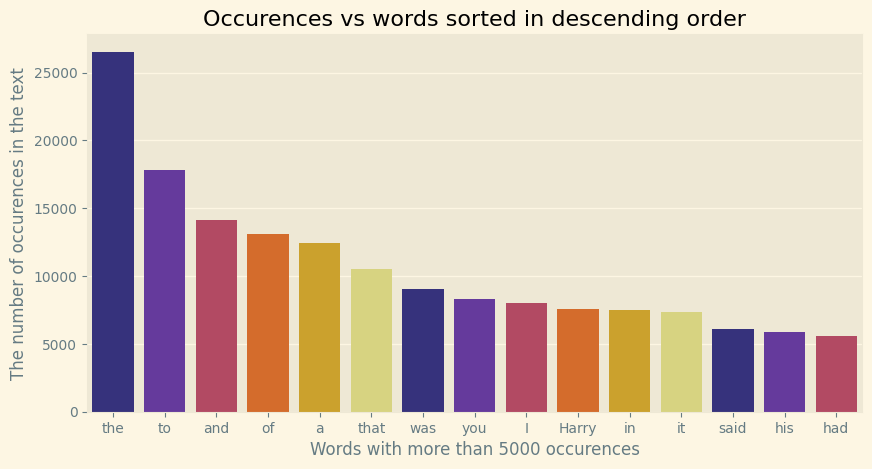

In [5]:
plt.style.use(['Solarize_Light2'])
plt.figure(figsize=(10, 5), dpi=100)
ax = sns.barplot(x=words_5000["word"], y=words_5000["count"], palette=sns.color_palette("CMRmap"))
ax.set(xlabel='Words with more than 5000 occurences', ylabel='The number of occurences in the text')
ax.set_title("Occurences vs words sorted in descending order")
plt.savefig('img/word_occurences.png', transparent=False, pad_inches=3, facecolor='white')

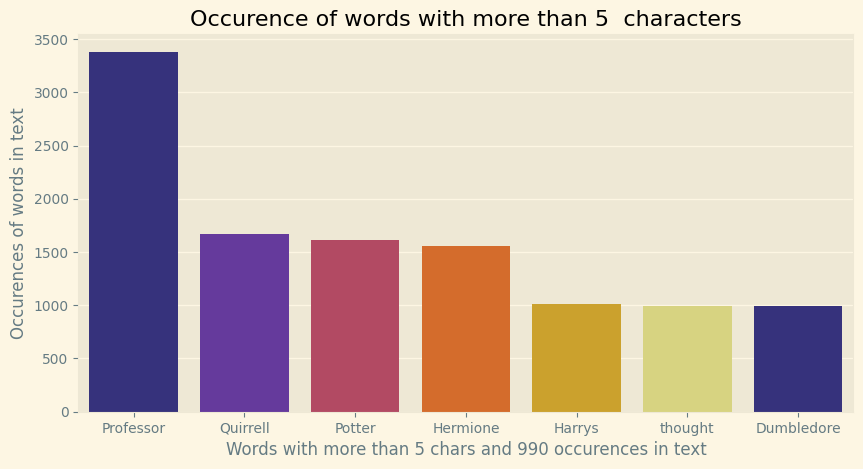

In [6]:
plt.figure(figsize=(10, 5), dpi=100)
ax = sns.barplot(x=words_len_990["word"], y=words_len_990["count"], palette=sns.color_palette("CMRmap"))
ax.set(xlabel='Words with more than 5 chars and 990 occurences in text', ylabel='Occurences of words in text')
ax.set_title("Occurence of words with more than 5  characters")
plt.savefig('img/word_occurencesvslength.png', transparent=False, pad_inches=3, facecolor='white')

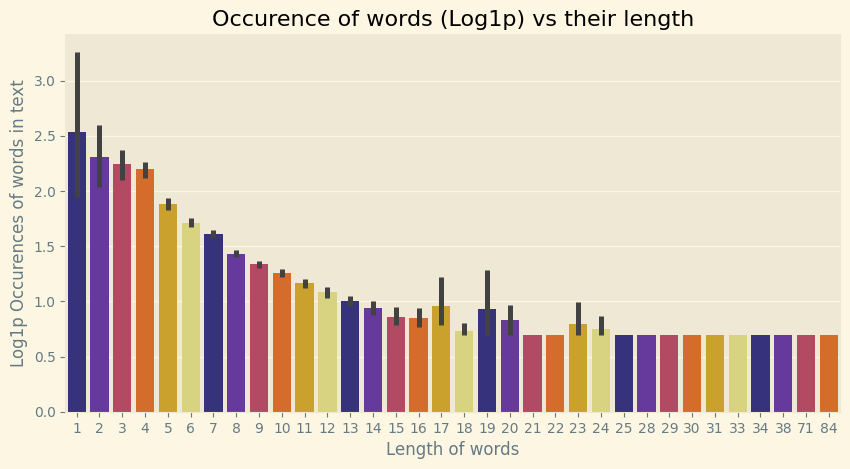

In [7]:
plt.figure(figsize=(10, 5), dpi=100)
ax = sns.barplot(x=pd.Series(words["word"]).str.len(), y=np.log1p(words["count"]), palette=sns.color_palette("CMRmap"))
ax.set(xlabel='Length of words', ylabel='Log1p Occurences of words in text')
ax.set_title("Occurence of words (Log1p) vs their length")
plt.savefig('img/word_occurenceslog1pvslength.png', transparent=False, pad_inches=3, facecolor='white')

In [8]:
print("Longest words: ")
print(" ")
for element in df["word"].astype(str).sort_values(key=lambda x: x.str.len(), ascending=False)[:20]:
    print(element)

Longest words: 
 
Luminosluminosluminosluminosluminosluminosluminosluminosluminosluminosluminosluminos
stickyourneckoutandmakeapredictionorstoppretendingtobelieveinyourtheory
Someonemightactuallygenuinelygetkilled
possiblynotjustpretendingtobecrazy
bodyhittingthegroundwithathuddish
impossibletopredictorunderstand
BoyWhoLivedUnlikeHisBestFriend
whatevertheheckwaswrongwithhim
AAAAAAAAAAAAAAHHHHHHHHHHHHHHH
informationsearchandretrieval
perhapsridiculouslyexpensive
scrambledengineblueprints
AIIIIIIIIIIEEEEEEEEEEEEEE
tenandthreequarterinches
possiblyultrahighquality
notreallychildrenanymore
BoyWhoDestroyedADementor
PotterEvansVerresGranger
GrangerPotterEvansVerres
PotterEvansVerresGranger


# Analysing character specific usage
---

In [9]:
df_chars = pd.read_csv('../data/data_chars.csv')

In [10]:
important_names = ['amelia bones', 'albus dumbledore', 'petunia evansverres', 'hermione granger', 'neville longbottom', 'draco malfoy', 'lucius malfoy','minerva mcgonagall', 'madeye moody', 'harry potter', 'quirinius quirrel', 'tom riddle', 'voldemort']

df_imp_names = df_chars[df_chars["name"].isin(important_names)]

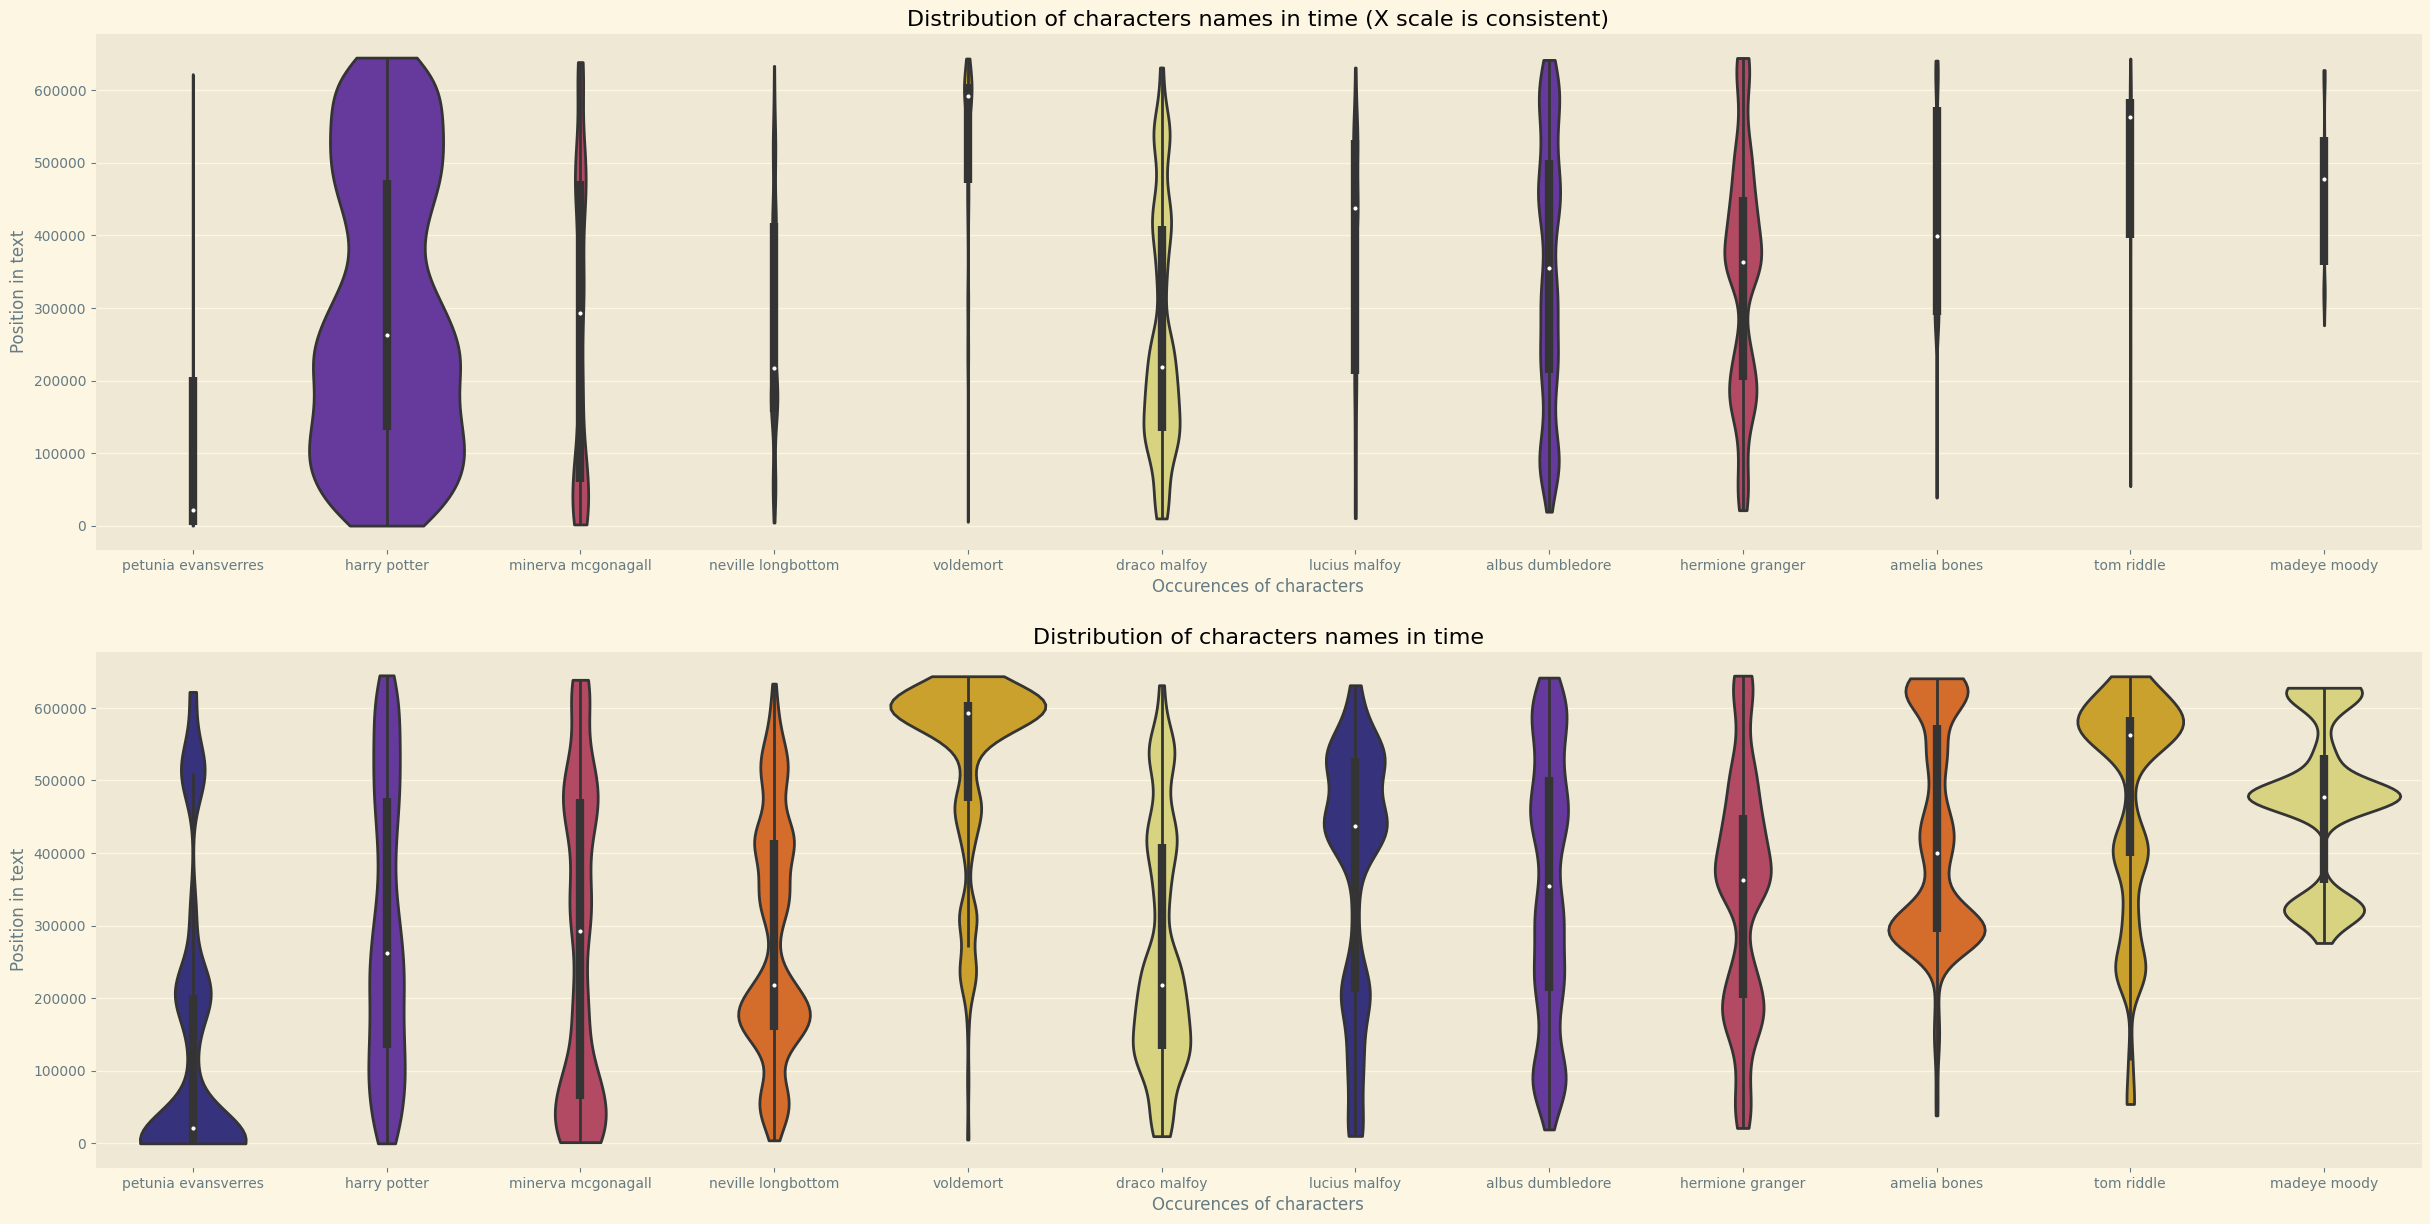

In [11]:
fig, axes = plt.subplots(2, 1, figsize=(30, 15), dpi=100, sharey=True)

ax = sns.violinplot(ax=axes[0], x=df_imp_names["name"], y=df_imp_names["position"], palette=sns.color_palette("CMRmap"), cut=0, bw=.2, scale="count")
ax.set(xlabel='Occurences of characters', ylabel='Position in text')
ax.set_title("Distribution of characters names in time (X scale is consistent)")

ax1 = sns.violinplot(ax=axes[1], x=df_imp_names["name"], y=df_imp_names["position"], palette=sns.color_palette("CMRmap"), cut=0, bw=.2)
ax1.set(xlabel='Occurences of characters', ylabel='Position in text')
ax1.set_title("Distribution of characters names in time")

plt.savefig('img/violinnameoccurences.png', transparent=False, pad_inches=3, facecolor='white')

In [12]:
def create_ridgeline_charmentionplot(df_imp_names): 
      sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
      g = sns.FacetGrid(df_imp_names, row="name", hue="name", aspect=20, height=1, palette=sns.color_palette("CMRmap"))

      g.map(sns.kdeplot, "position",
            bw_adjust=.5, clip_on=False,
            fill=True, alpha=1, linewidth=1.5)
      g.map(sns.kdeplot, "position", clip_on=False, color="w", lw=2, bw_adjust=.5)
      g.map(plt.axhline, y=0, lw=2, clip_on=False)

      def label(x, color, label):
            ax = plt.gca()
            ax.text(0, .2, label, color=color,
                        ha="left", va="center", transform=ax.transAxes, fontsize=20)

      g.map(label, "position")

      g.fig.subplots_adjust(hspace=-.25)

      g.set_titles("")
      g.set(yticks=[])
      g.despine(bottom=True, left=True)

      plt.savefig('img/ridgeline.png', transparent=False, pad_inches=3, facecolor='white')

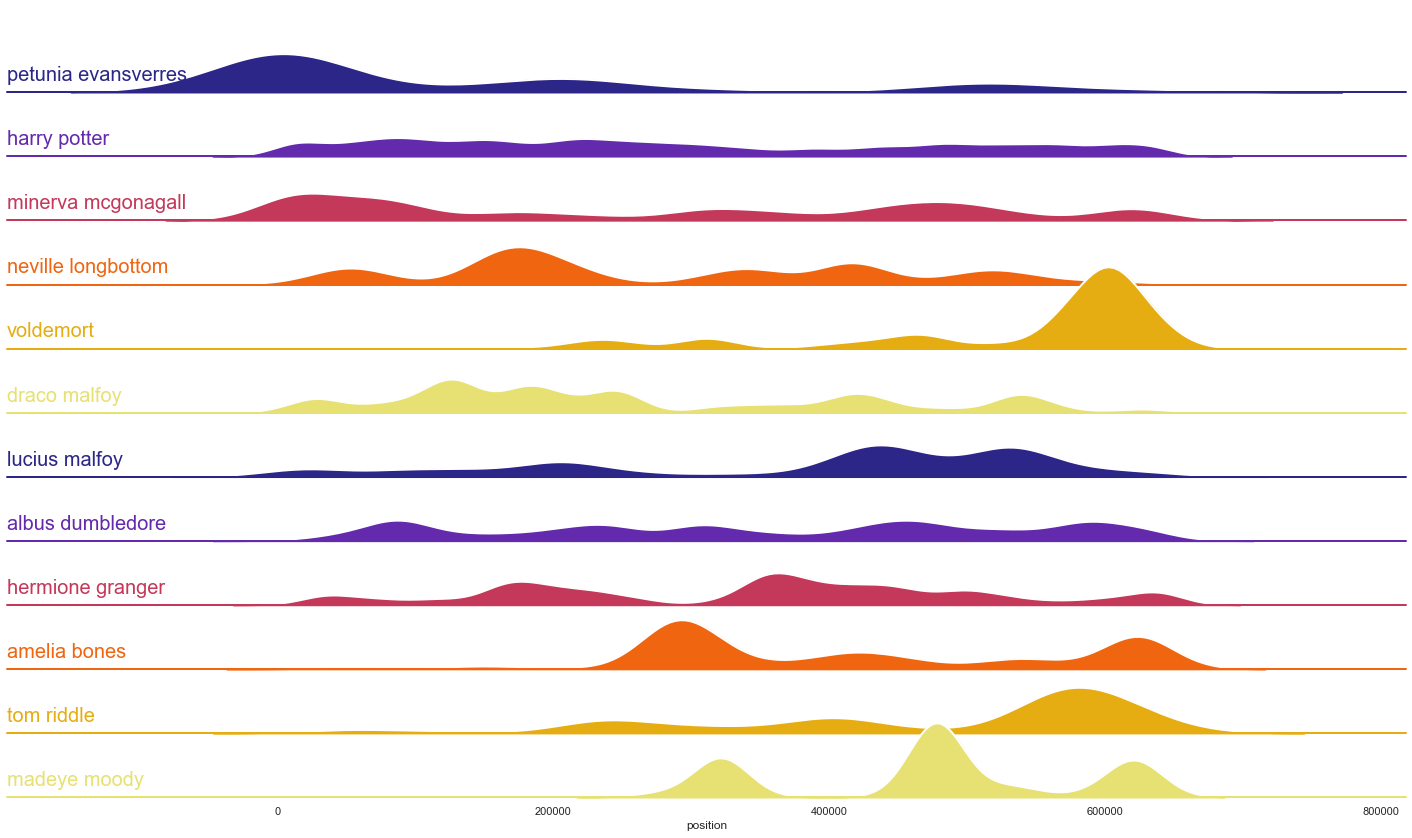

In [13]:
create_ridgeline_charmentionplot(df_imp_names)

# Network Graph
---

In [14]:
df_chars_pair = {'names': [], "str": [], 'position': [],  'weight': []}

maxdist = 10

lastcharmention = -100
lastchar = ""
for index, row in df_chars.iterrows():
    word = row["name"]
    if word != lastchar:
        if row["position"] - lastcharmention < maxdist:
            df_chars_pair['names'].append(sorted([word, lastchar]))
            df_chars_pair['str'].append(str(sorted([word, lastchar])))
            df_chars_pair['position'].append(row["position"])
            df_chars_pair['weight'].append(row["position"] - lastcharmention)
        elif row["position"] - lastcharmention < maxdist:
            df_chars_pair['names'].append(sorted([word, lastchar]))
            df_chars_pair['str'].append(str(sorted([word, lastchar])))
            df_chars_pair['position'].append(row["position"])
            df_chars_pair['weight'].append(row["position"] - lastcharmention)

    lastcharmention = row["position"]
    lastchar = word

df_chars_pair = pd.DataFrame(df_chars_pair)

In [15]:
df_chars_pair_noharry = {'names': [], "str": [], 'position': [],  'weight': []}

maxdist = 10

lastcharmention = -100
lastchar = ""
for index, row in df_chars.iterrows():
    word = row["name"]
    if word == 'harry potter':
        continue
    if word != lastchar:
        if row["position"] - lastcharmention < maxdist:
            df_chars_pair_noharry['names'].append(sorted([word, lastchar]))
            df_chars_pair_noharry['str'].append(str(sorted([word, lastchar])))
            df_chars_pair_noharry['position'].append(row["position"])
            df_chars_pair_noharry['weight'].append(row["position"] - lastcharmention)
        elif row["position"] - lastcharmention < maxdist:
            df_chars_pair_noharry['names'].append(sorted([word, lastchar]))
            df_chars_pair_noharry['str'].append(str(sorted([word, lastchar])))
            df_chars_pair_noharry['position'].append(row["position"])
            df_chars_pair_noharry['weight'].append(row["position"] - lastcharmention)

    lastcharmention = row["position"]
    lastchar = word

df_chars_pair_noharry = pd.DataFrame(df_chars_pair_noharry)

In [16]:
import itertools
from pyvis.network import Network
import math
from time import sleep
from tqdm.notebook import tqdm

In [17]:
net = Network(height='100%', width='100%', bgcolor='#222222', font_color='white')
net.barnes_hut()
count_char_df = pd.DataFrame(df_chars_pair["str"].value_counts())
for e in count_char_df["str"].iteritems():
    d = eval(e[0])
    src = d[0]
    dst = d[1]
    w = e[1]

    net.add_node(src, src, title=src)
    net.add_node(dst, dst, title=dst)
    net.add_edge(src, dst, physics=True, value=w)

net.show('net.html')

In [18]:
df_chars_pair_counts = pd.DataFrame()
df_chars_pair_counts["pair"] = df_chars_pair["str"].value_counts().index
df_chars_pair_counts["value"] = list(pd.DataFrame(df_chars_pair["str"].value_counts())["str"])

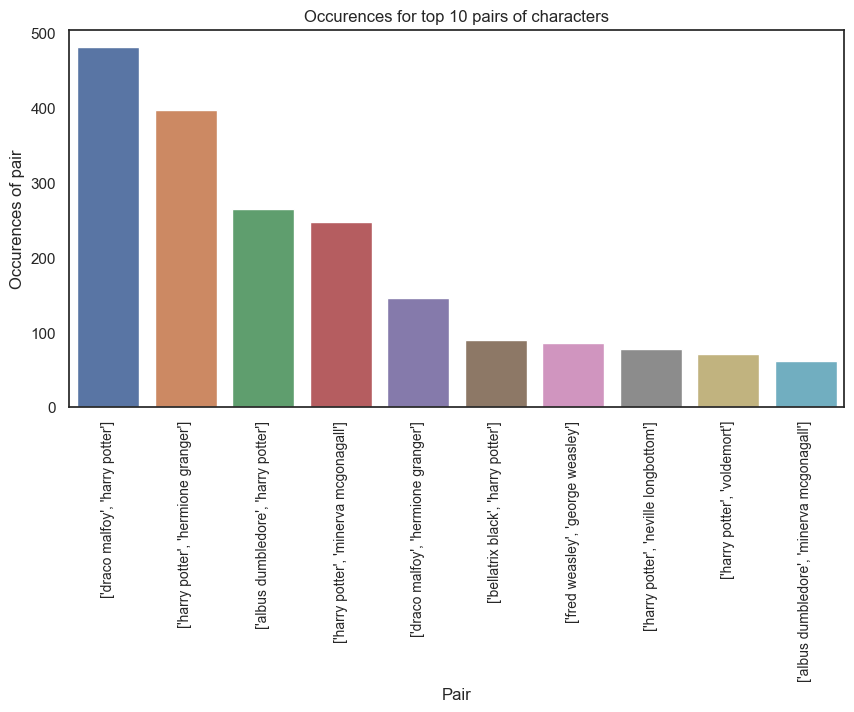

In [19]:
plt.figure(figsize=(10, 5), dpi=100)

ax = sns.barplot(x=df_chars_pair_counts["pair"][:10], y=df_chars_pair_counts["value"][:10])
ax.set(xlabel='Pair', ylabel='Occurences of pair')
ax.set_title("Occurences for top 10 pairs of characters")
ax.set_xticklabels(labels=df_chars_pair_counts["pair"][:10], rotation=90, fontsize=10)
plt.savefig('img/occurencespairstop10.png', transparent=False, pad_inches=1, facecolor='white', bbox_inches='tight')

In [20]:
df_chars_pair_counts_noharry = pd.DataFrame()
df_chars_pair_counts_noharry["pair"] = df_chars_pair_noharry["str"].value_counts().index
df_chars_pair_counts_noharry["value"] = list(pd.DataFrame(df_chars_pair_noharry["str"].value_counts())["str"])

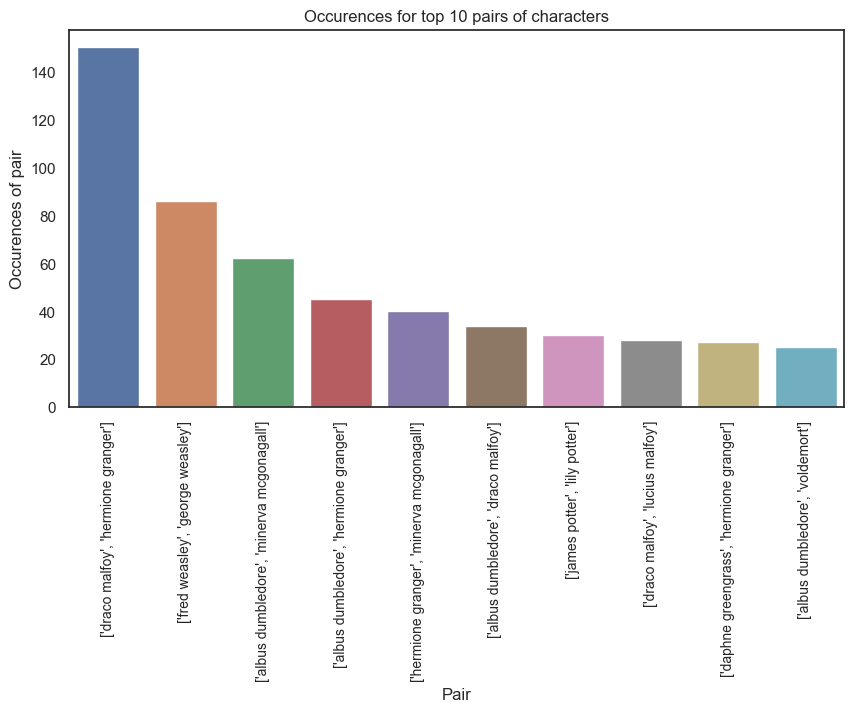

In [21]:
plt.figure(figsize=(10, 5), dpi=100)

ax = sns.barplot(x=df_chars_pair_counts_noharry["pair"][:10], y=df_chars_pair_counts_noharry["value"][:10])
ax.set(xlabel='Pair', ylabel='Occurences of pair')
ax.set_title("Occurences for top 10 pairs of characters")
ax.set_xticklabels(labels=df_chars_pair_counts_noharry["pair"][:10], rotation=90, fontsize=10)
plt.savefig('img/occurencespairstop10noharry.png', transparent=False, pad_inches=1, facecolor='white', bbox_inches='tight')